# Building Functions

In [1]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    #lists of even length divided by 2 have reminder 0
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in list_obj:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in list_obj:
        # add on to the count of the value for each occurrence in list_obj
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(list_obj)
    # use n to calculate average of sum squared diffs
    n = len(list_obj)
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in list_obj:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    # Standard deviation is the square root of variance
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    # determine the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [2]:
lst = [5,8,23,9,3,6,3,4,8,5,5,7,5,22,55,76,1,2,4,3,2,6,99]
lst_2 = [7,2,2,8,2,99,5,9,10,6,2,3,58,12,65,86,4,2,6,34,2,8,82]
print("Total:",total(lst))
print("Total_lst_2:",total(lst_2))
print()
print("Mean:", mean(lst))
print("Mean_lst_2:", mean(lst_2))
print()
print("Median:",median(lst))
print("Median_lst_2:",median(lst_2))
print()
print("Mode:", mode(lst))
print("Mode_lst_2:", mode(lst_2))
print()
print("Variance:", variance(lst))
print("Variance_lst_2:", variance(lst_2))
print()
print("Standard Deviation:", SD(lst))
print("Standard Deviation_lst_2:", SD(lst_2))
print()
print("Covariance:", covariance(lst,lst_2))
print()
print("Correlation:", correlation(lst,lst_2))
print()
print("Skewness:", skewness(lst))
print("Skewness_lst_2:", skewness(lst_2))
print()
print("Kurtosis:", kurtosis(lst))
print("Kurtosis_lst_2:", kurtosis(lst_2))

Total: 361
Total_lst_2: 514

Mean: 15.695652173913043
Mean_lst_2: 22.347826086956523

Median: 5
Median_lst_2: 7

Mode: [5]
Mode_lst_2: [2]

Variance: 628.124763705104
Variance_lst_2: 949.0094517958412

Standard Deviation: 25.062417355576535
Standard Deviation_lst_2: 30.80599701025502

Covariance: 515.758034026465

Correlation: 0.668017400265009

Skewness: 2.29932963060345
Skewness_lst_2: 1.4161121147901328

Kurtosis: 7.062837427305225
Kurtosis_lst_2: 3.3921309568833067


# Create a function that generates a datastructure with stats for each column of data

In [3]:
import pandas as pd
import pandas_datareader.data as web
import datetime
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        # drop any missing observations from dataframe
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        # skip mode. . .         dct[key]["mode"] = mode(val)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)
    return stats_df    

In [4]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime.today()

data_dict = {}
tickers = ["AAPL", "NVDA", "AMZN", "BRK-B"]

for key in tickers:
    data_dict[key] = web.DataReader(key, "yahoo", start, end)

data_dict

{'AAPL':                   High         Low        Open       Close       Volume  \
 Date                                                                      
 2012-01-03   14.732143   14.607143   14.621429   14.686786  302220800.0   
 2012-01-04   14.810000   14.617143   14.642857   14.765714  260022000.0   
 2012-01-05   14.948214   14.738214   14.819643   14.929643  271269600.0   
 2012-01-06   15.098214   14.972143   14.991786   15.085714  318292800.0   
 2012-01-09   15.276786   15.048214   15.196429   15.061786  394024400.0   
 ...                ...         ...         ...         ...          ...   
 2021-09-29  144.449997  142.029999  142.470001  142.830002   74602000.0   
 2021-09-30  144.380005  141.279999  143.660004  141.500000   88934200.0   
 2021-10-01  142.919998  139.110001  141.899994  142.649994   94639600.0   
 2021-10-04  142.210007  138.270004  141.759995  139.139999   98180300.0   
 2021-10-05  140.729996  139.360001  139.490005  140.720001   25117922.0   
 
  

In [5]:
data_dict[key]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,78.290001,77.309998,77.379997,77.680000,5343500,77.680000
2012-01-04,77.550003,76.599998,77.550003,76.800003,4264400,76.800003
2012-01-05,77.120003,75.860001,76.410004,76.930000,4235400,76.930000
2012-01-06,77.110001,76.129997,76.809998,76.389999,3751400,76.389999
2012-01-09,76.769997,75.940002,76.489998,76.290001,2978200,76.290001
...,...,...,...,...,...,...
2021-09-29,278.779999,275.950012,277.029999,277.290009,2952000,277.290009
2021-09-30,278.369995,272.839996,278.369995,272.940002,5187900,272.940002
2021-10-01,277.510010,272.220001,273.019989,275.709991,3950700,275.709991


In [6]:
data_dict.keys()

dict_keys(['AAPL', 'NVDA', 'AMZN', 'BRK-B'])

In [7]:
data_dict.values()

dict_values([                  High         Low        Open       Close       Volume  \
Date                                                                      
2012-01-03   14.732143   14.607143   14.621429   14.686786  302220800.0   
2012-01-04   14.810000   14.617143   14.642857   14.765714  260022000.0   
2012-01-05   14.948214   14.738214   14.819643   14.929643  271269600.0   
2012-01-06   15.098214   14.972143   14.991786   15.085714  318292800.0   
2012-01-09   15.276786   15.048214   15.196429   15.061786  394024400.0   
...                ...         ...         ...         ...          ...   
2021-09-29  144.449997  142.029999  142.470001  142.830002   74602000.0   
2021-09-30  144.380005  141.279999  143.660004  141.500000   88934200.0   
2021-10-01  142.919998  139.110001  141.899994  142.649994   94639600.0   
2021-10-04  142.210007  138.270004  141.759995  139.139999   98180300.0   
2021-10-05  140.729996  139.360001  139.490005  140.720001   25117922.0   

           

In [8]:
for df in data_dict.values():
    print(df["Close"])

Date
2012-01-03     14.686786
2012-01-04     14.765714
2012-01-05     14.929643
2012-01-06     15.085714
2012-01-09     15.061786
                 ...    
2021-09-29    142.830002
2021-09-30    141.500000
2021-10-01    142.649994
2021-10-04    139.139999
2021-10-05    140.720001
Name: Close, Length: 2456, dtype: float64
Date
2012-01-03      3.510000
2012-01-04      3.550000
2012-01-05      3.677500
2012-01-06      3.635000
2012-01-09      3.635000
                 ...    
2021-09-29    205.169998
2021-09-30    207.160004
2021-10-01    207.419998
2021-10-04    197.320007
2021-10-05    204.149994
Name: Close, Length: 2456, dtype: float64
Date
2012-01-03     179.029999
2012-01-04     177.509995
2012-01-05     177.610001
2012-01-06     182.610001
2012-01-09     178.559998
                 ...     
2021-09-29    3301.120117
2021-09-30    3285.040039
2021-10-01    3283.260010
2021-10-04    3189.780029
2021-10-05    3251.919922
Name: Close, Length: 2456, dtype: float64
Date
2012-01-03     77.

In [9]:
# calls the close values for each df the keys option lets you call the names of the stock
# then you want to call axis 1 so that it stacks the values side by side (Horizontally)
close_data = pd.concat((df["Close"] for df in data_dict.values()), keys = data_dict.keys(), axis = 1)
close_data

,AAPL,NVDA,AMZN,BRK-B
Date,,,,
2012-01-03,14.686786,3.510000,179.029999,77.680000
2012-01-04,14.765714,3.550000,177.509995,76.800003
2012-01-05,14.929643,3.677500,177.610001,76.930000
2012-01-06,15.085714,3.635000,182.610001,76.389999
2012-01-09,15.061786,3.635000,178.559998,76.290001
...,...,...,...,...
2021-09-29,142.830002,205.169998,3301.120117,277.290009
2021-09-30,141.500000,207.160004,3285.040039,272.940002
2021-10-01,142.649994,207.419998,3283.260010,275.709991


## Pandas has a built in matplotlib extension

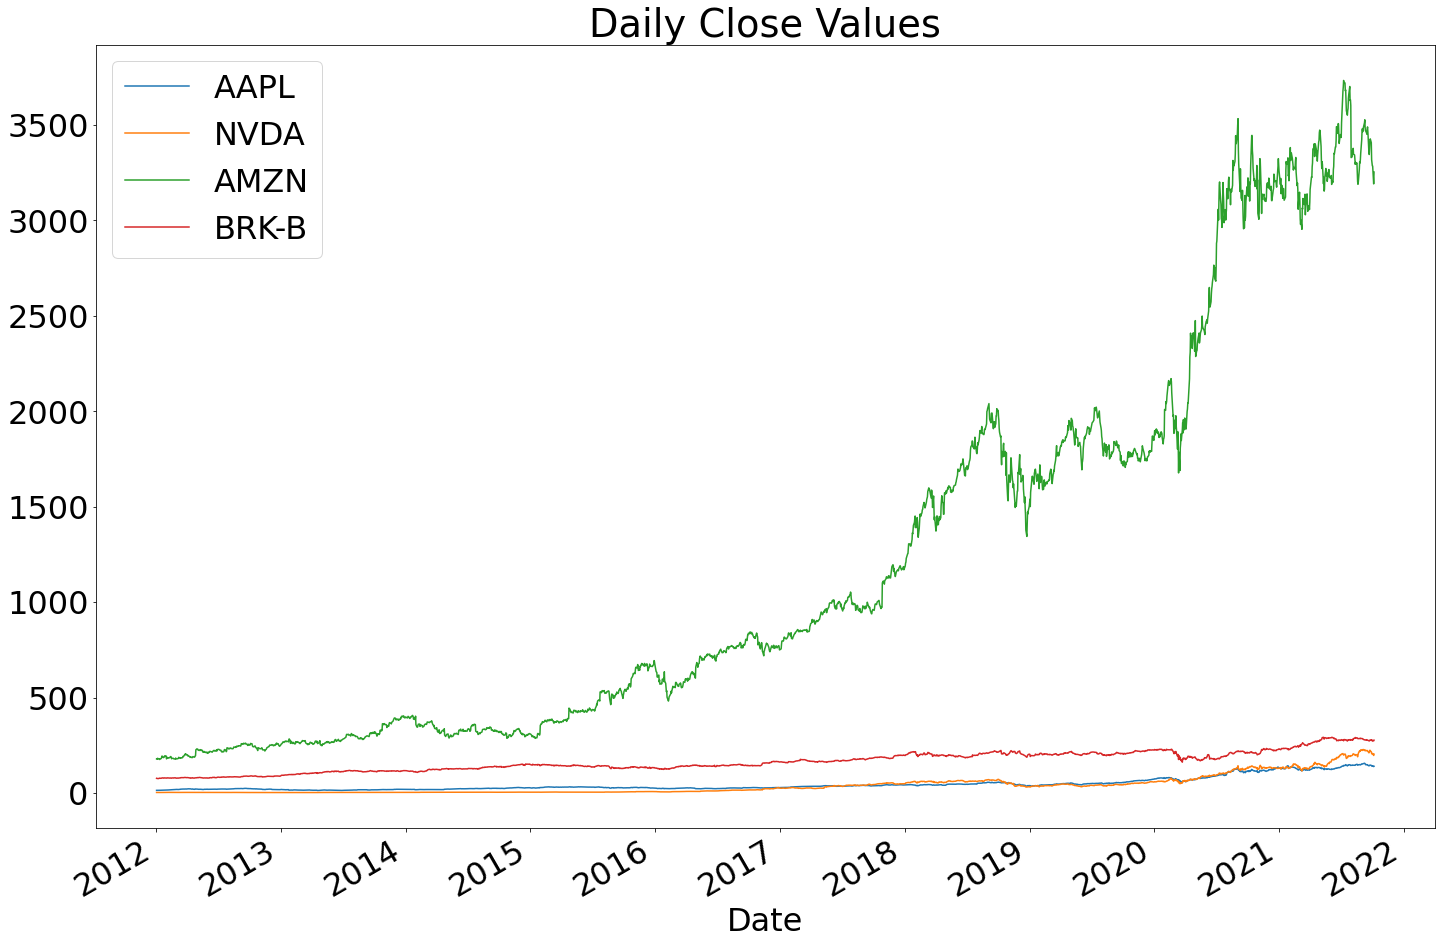

In [10]:
import matplotlib.pyplot as plt

#set default font size
plt.rcParams.update({"font.size": 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Daily Close Values")
plt.show()
plt.close();

# Normalize that data to make it more appealing

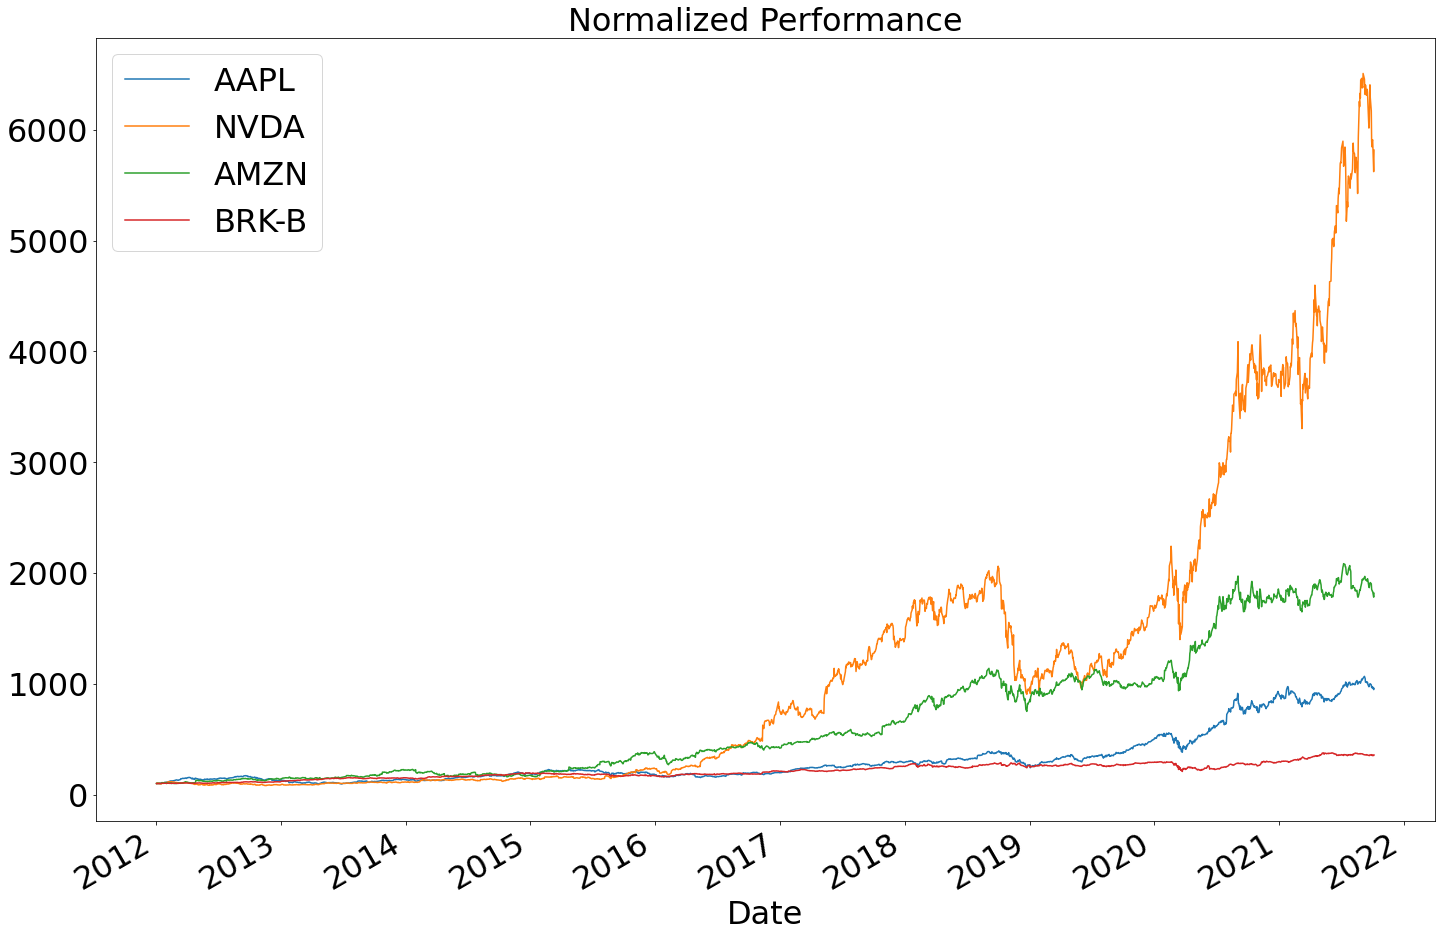

In [11]:
fig, ax = plt.subplots(figsize = (24,16))
(close_data / close_data.iloc[0] * 100).plot.line(legend = True, ax = ax)
plt.title("Normalized Performance", fontsize = 32,)
plt.show()
plt.close()

## It is helpful to log the y axis to view change in terms of proportion

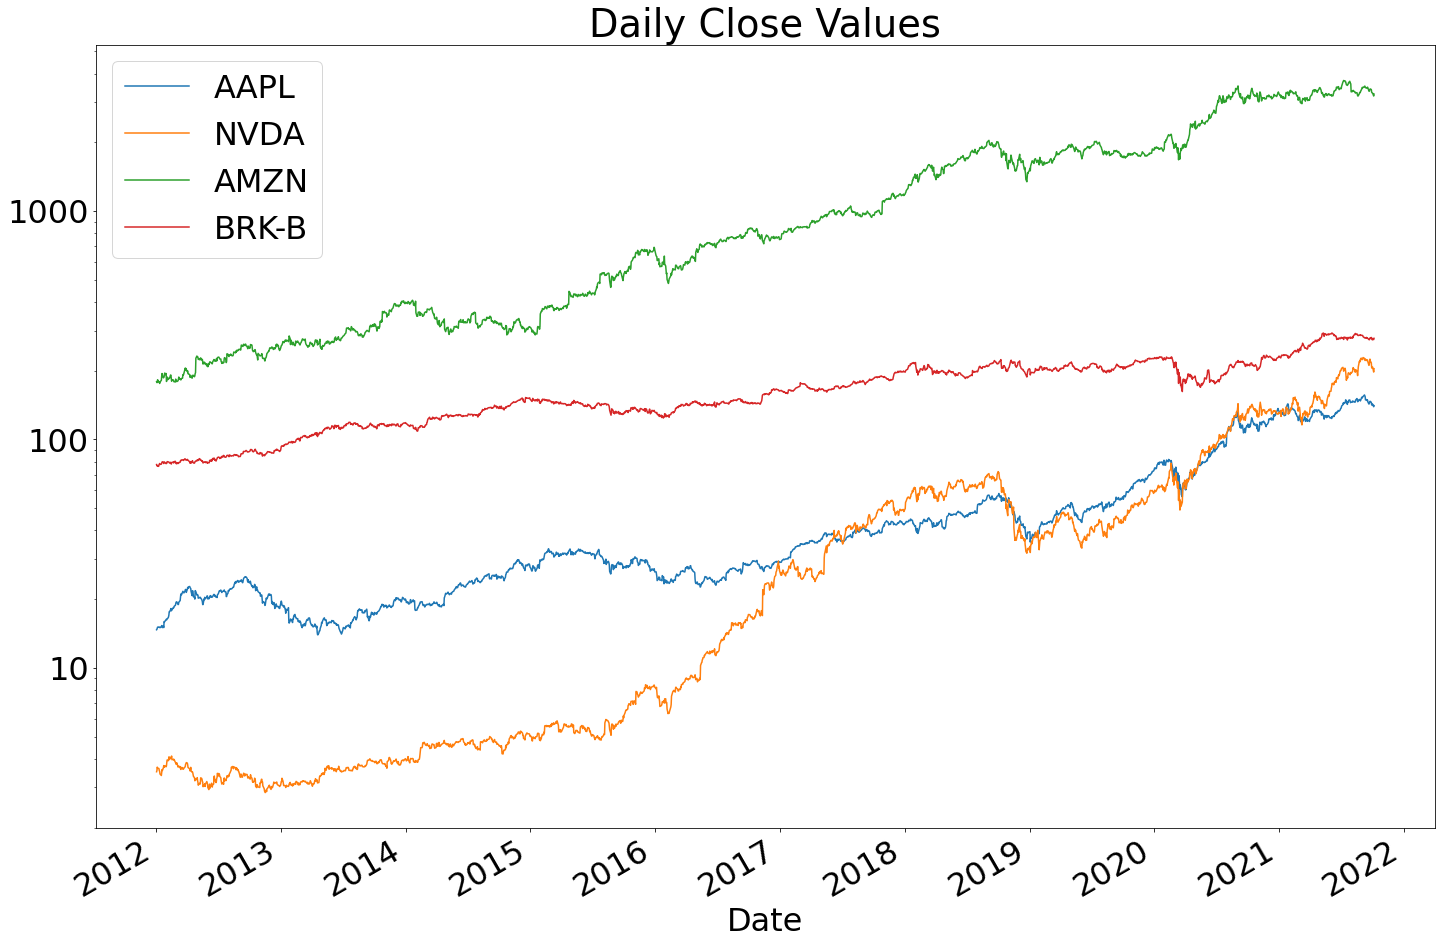

In [12]:
plt.rcParams.update({"font.size": 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Daily Close Values")
ax.set_yscale("log")
# allows us to judge the slopes of the lines over time
plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0.01

y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y>=1 else round(y,1) for y in y_vals]);
# transforms the y values into ints from the sci notation

# Percent Changes

In [13]:
price_change_data = close_data.pct_change() *100
price_change_data

,AAPL,NVDA,AMZN,BRK-B
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.537408,1.139600,-0.849022,-1.132849
2012-01-05,1.110200,3.591551,0.056338,0.169267
2012-01-06,1.045381,-1.155677,2.815157,-0.701938
2012-01-09,-0.158618,0.000000,-2.217843,-0.130905
...,...,...,...,...
2021-09-29,0.648297,-0.879273,-0.447528,0.180642
2021-09-30,-0.931178,0.969930,-0.487110,-1.568757
2021-10-01,0.812717,0.125504,-0.054186,1.014871


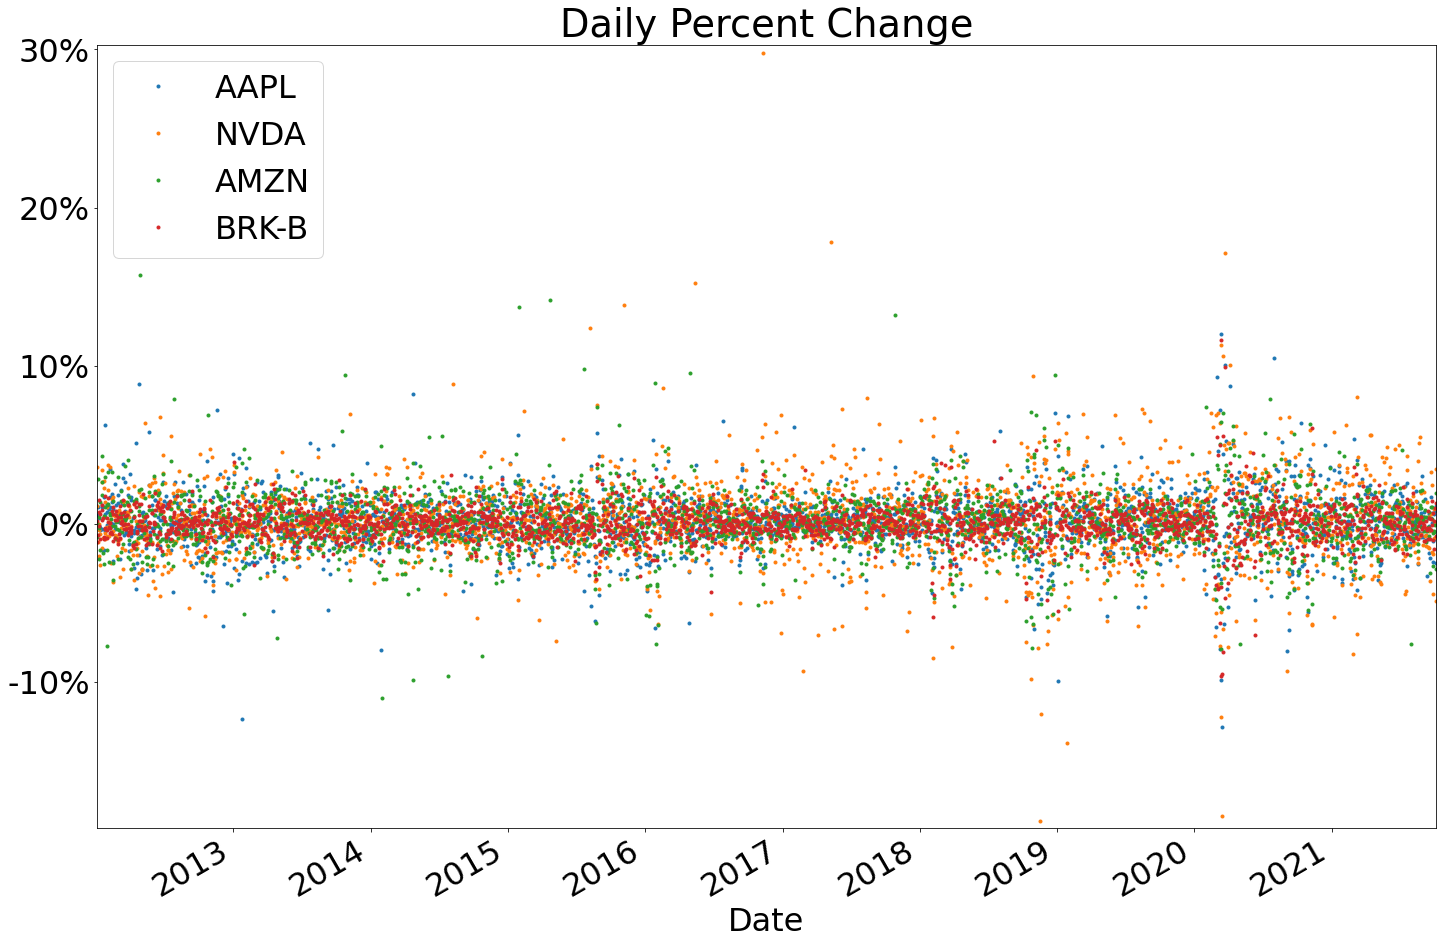

In [14]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Daily Percent Change")
# gather axis labels
y_vals = ax.get_yticks()
# transform the ints into str and then add the percent 
# if you didn't do this you would have values on the y axis not have a %
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

In [15]:
stats_df = gather_statistics(price_change_data, 
                             sample = True)
stats_df

,AAPL,NVDA,AMZN,BRK-B
mean,0.108,0.198,0.136,0.059
median,0.081,0.169,0.113,0.048
variance,3.218,6.448,3.647,1.360
S.D.,1.794,2.539,1.910,1.166
skewness,-0.120,0.618,0.552,-0.032
kurtosis,6.436,13.928,8.203,13.357


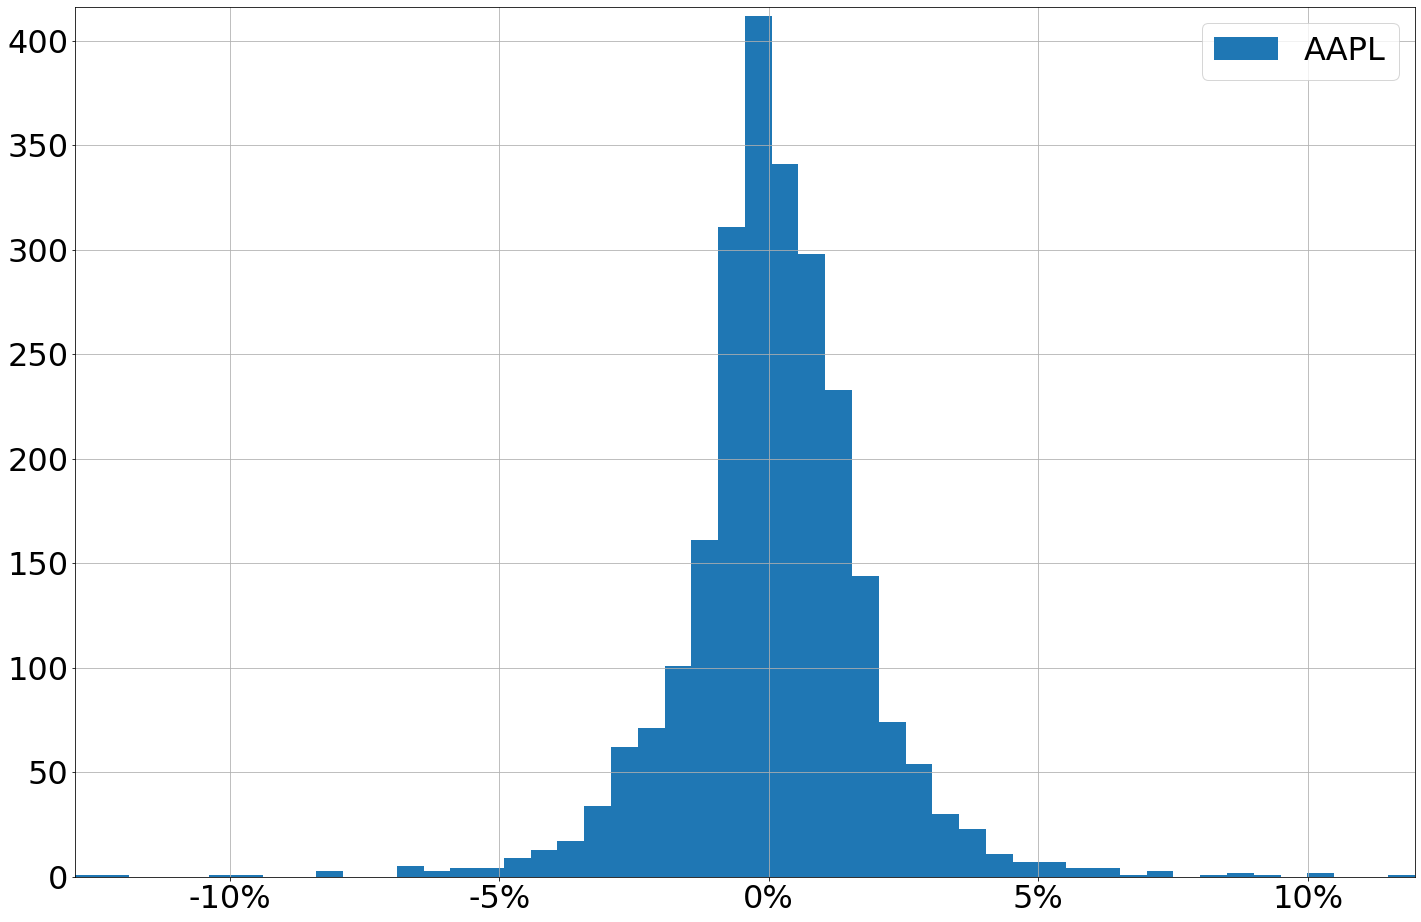

In [16]:
fig, ax = plt.subplots(figsize = (24,16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
plt.legend();

## Instead of a Histogram with counts lets plot it with a density function

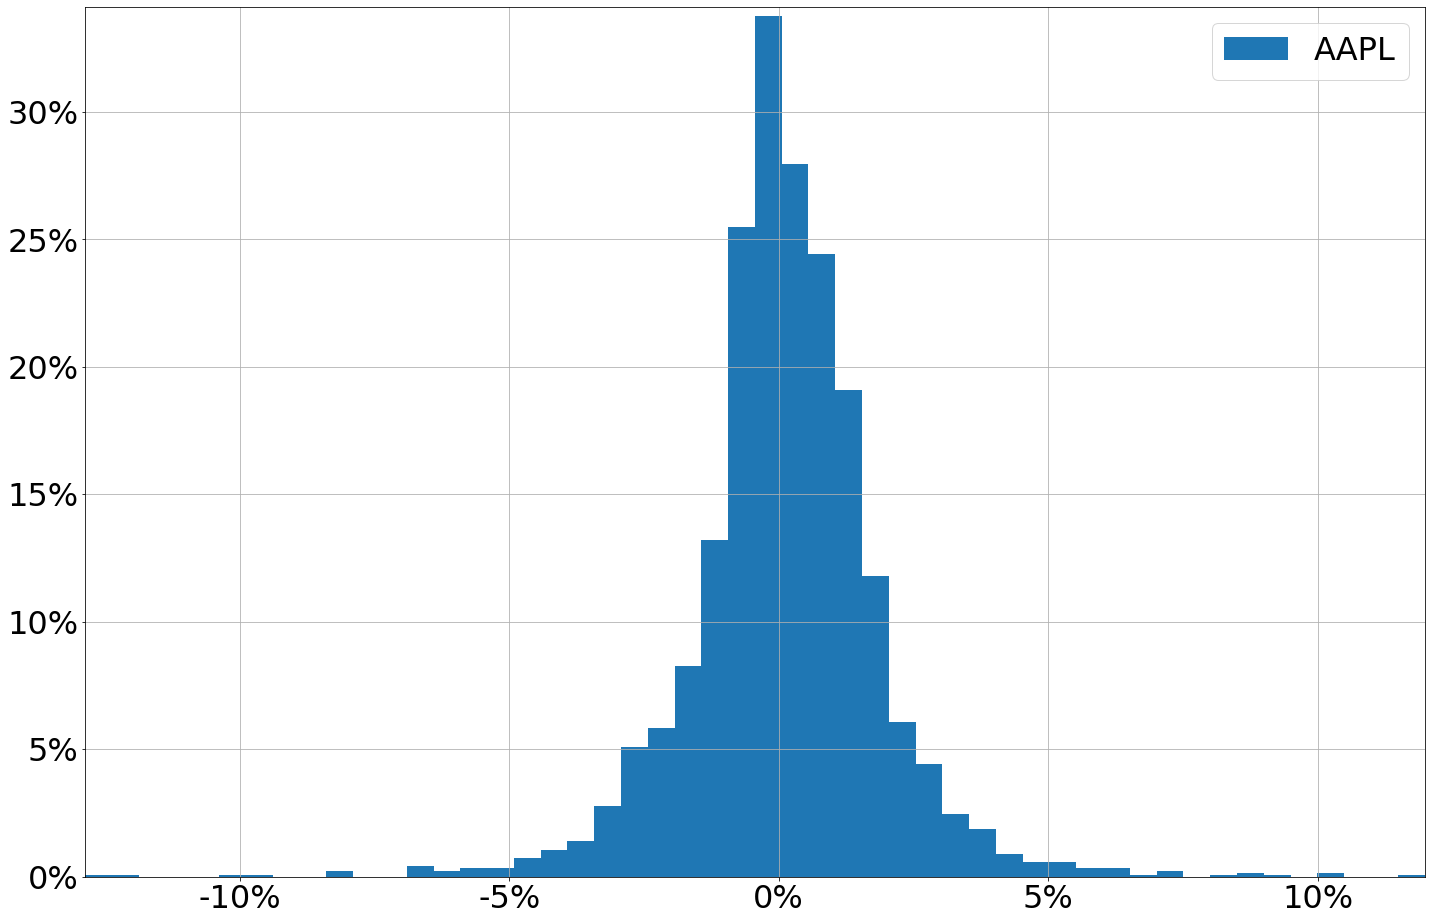

In [17]:
fig, ax = plt.subplots(figsize = (24,16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL", density = True)

x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals]) 

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

plt.legend();

# Create 4 density plots

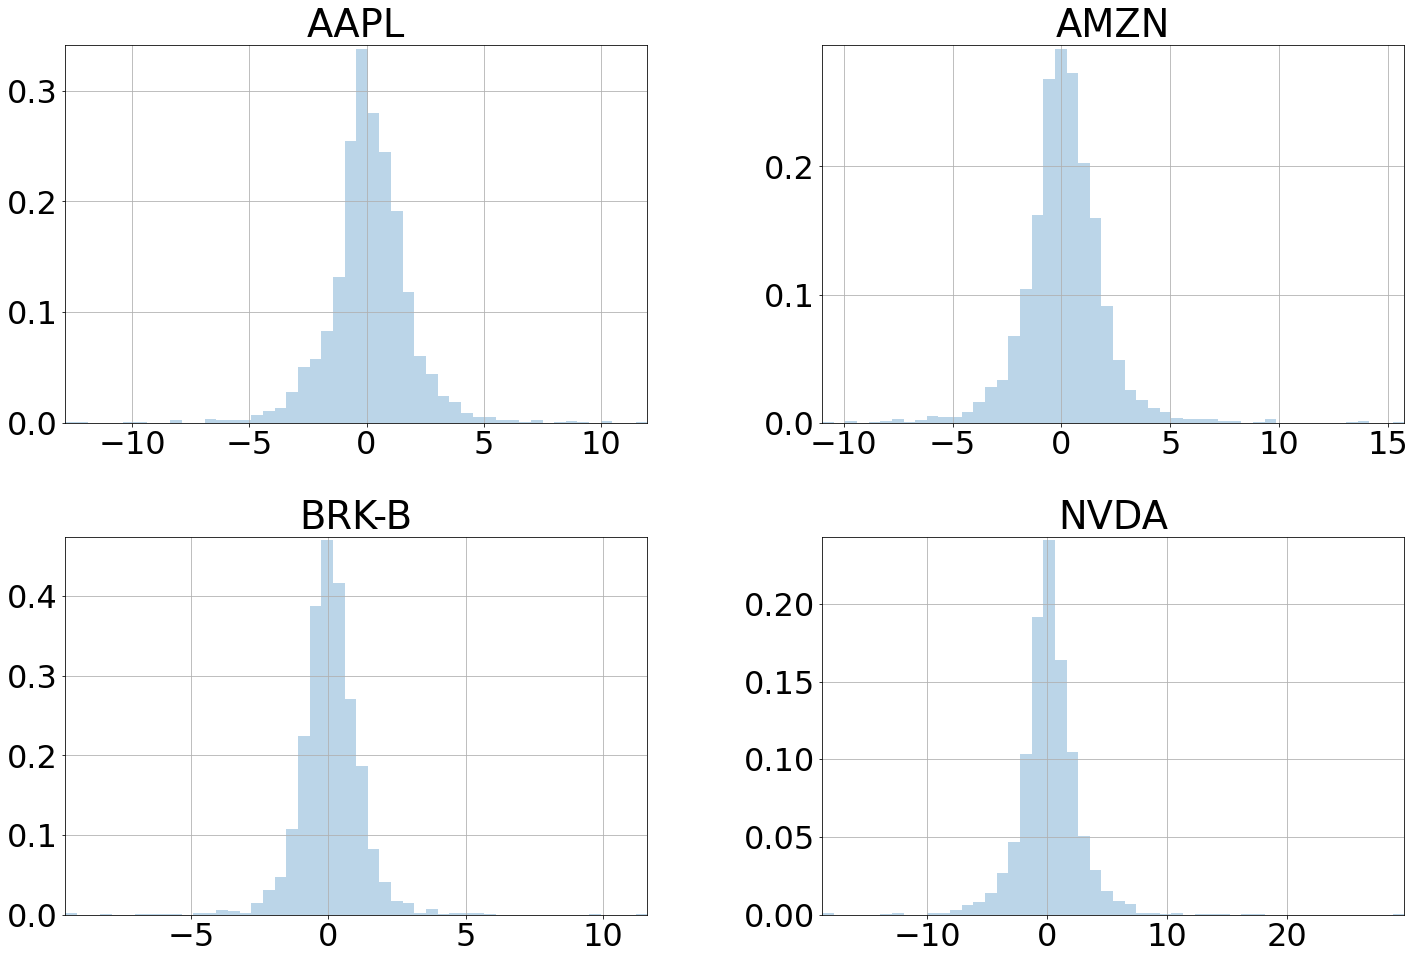

In [18]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
price_change_data.hist(bins = 50, 
                       alpha = 0.3,
                       label = price_change_data.keys(),
                       ax = ax, density = True);

# Create figure with 4 plots that shows the stats and fixes the x and y labels

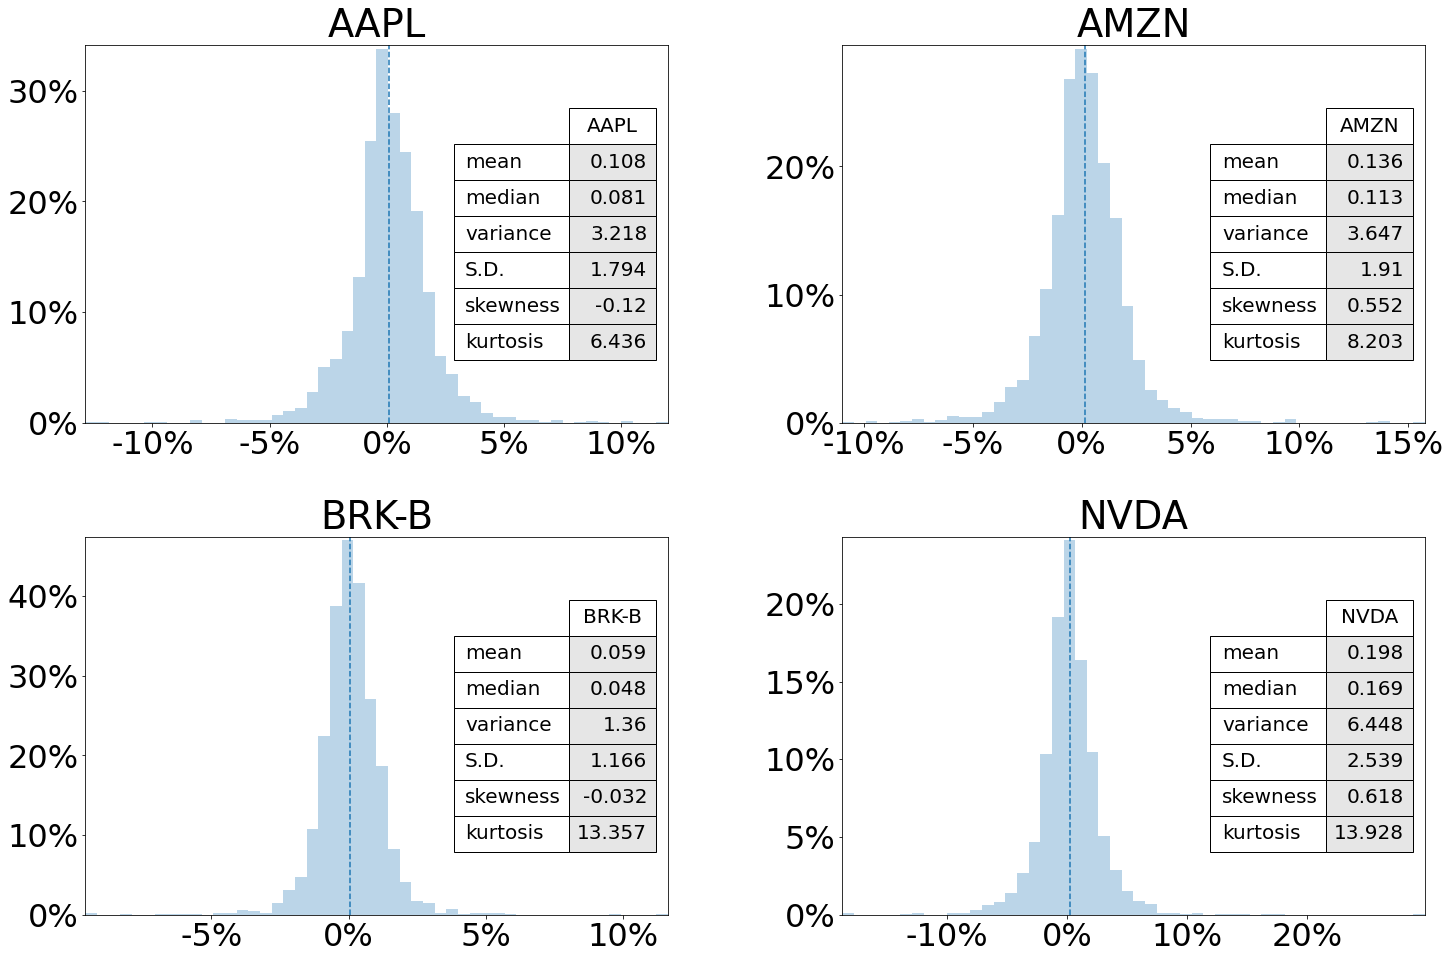

In [19]:
from pandas.plotting import table
fig, ax = plt.subplots(2,2, figsize = (24,16))
price_change_data.hist(bins = 50, 
                       alpha = 0.3,
                       label = price_change_data.keys(),
                       ax = ax, density = True)

for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        stock = a.get_title()
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y*100))+ "%" for y in y_vals])
        hist_data = stats_df[stock]
        stats = table(a, hist_data, colWidths=[0.1], cellColours = [[(0.9,0.9,0.9)]]*6,loc = "center right")
        stats.scale(1.5,3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        a.axvline(x = hist_data.loc["mean"], ls = "--")
        a.grid(False)
        
plt.show()
plt.close()

# Create these on a single plot

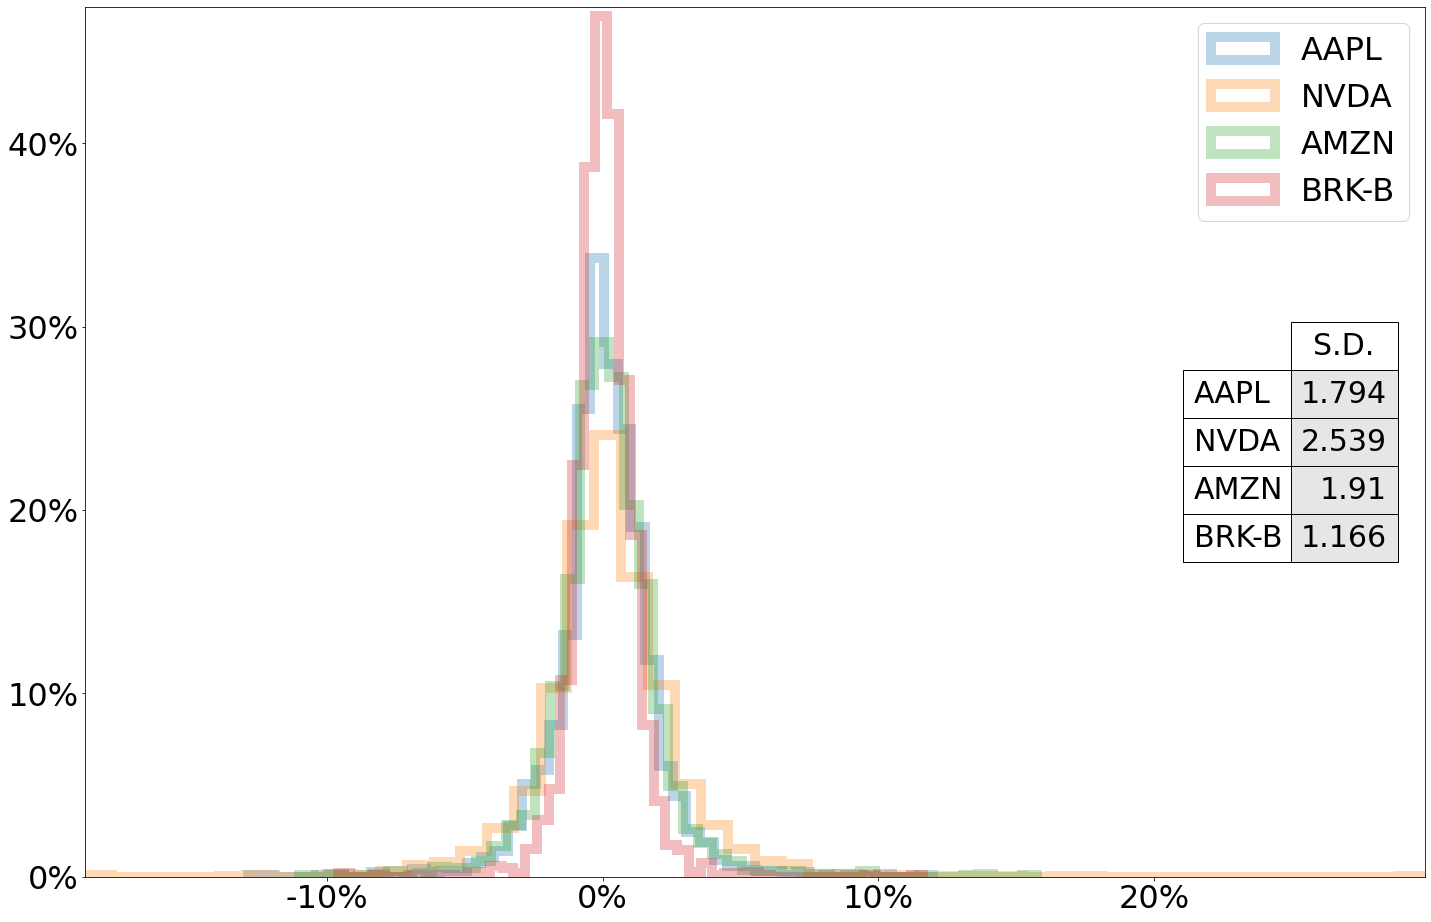

In [20]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, 
                                histtype = "step", 
                                alpha = .3, 
                                label = key, 
                                linewidth = 10, 
                                density = True)

x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend();

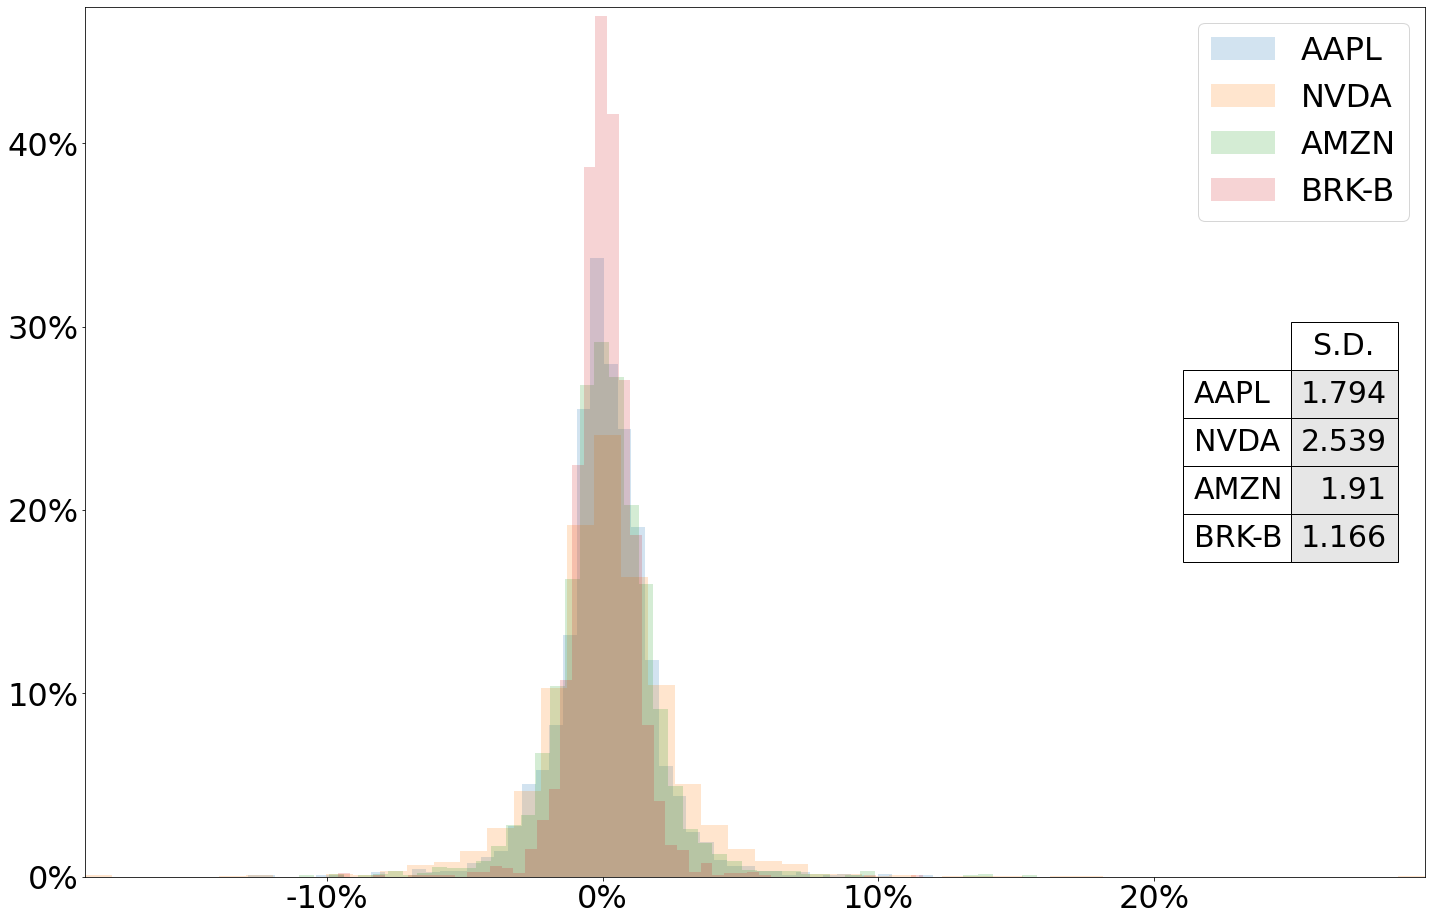

In [21]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, alpha = .2, label = key, 
                                density = True)

x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend();